In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def generate_data(seq_length,num_samples):
  X = []
  y = []
  for i in range(num_samples):
    x = np.linspace(i*2*np.pi, (i+1)*2*np.pi, seq_length +1)
    sin_wave = np.sin(x)
    X.append(sin_wave[:-1])
    y.append(sin_wave[1:])
  return np.array(X), np.array(y)

seq_length  = 50
num_samples = 1000
X, y = generate_data(seq_length, num_samples)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

print(X.shape, y.shape)  # (1000, 50), (1000, 50)


torch.Size([1000, 50]) torch.Size([1000, 50])


In [10]:
class SimpleRNN(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(SimpleRNN, self).__init__()
    self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    h0 = torch.zeros(1, x.size(0), hidden_size)
    out, _ = self.rnn(x, h0)
    out = self.fc(out)
    return out

input_size = 1
hidden_size = 10
output_size = 1
model = SimpleRNN(input_size, hidden_size, output_size)

In [15]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X.unsqueeze(2))
    loss = criterion(outputs, y.unsqueeze(2))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0391
Epoch [20/100], Loss: 0.0261
Epoch [30/100], Loss: 0.0168
Epoch [40/100], Loss: 0.0104
Epoch [50/100], Loss: 0.0066
Epoch [60/100], Loss: 0.0045
Epoch [70/100], Loss: 0.0034
Epoch [80/100], Loss: 0.0027
Epoch [90/100], Loss: 0.0021
Epoch [100/100], Loss: 0.0018


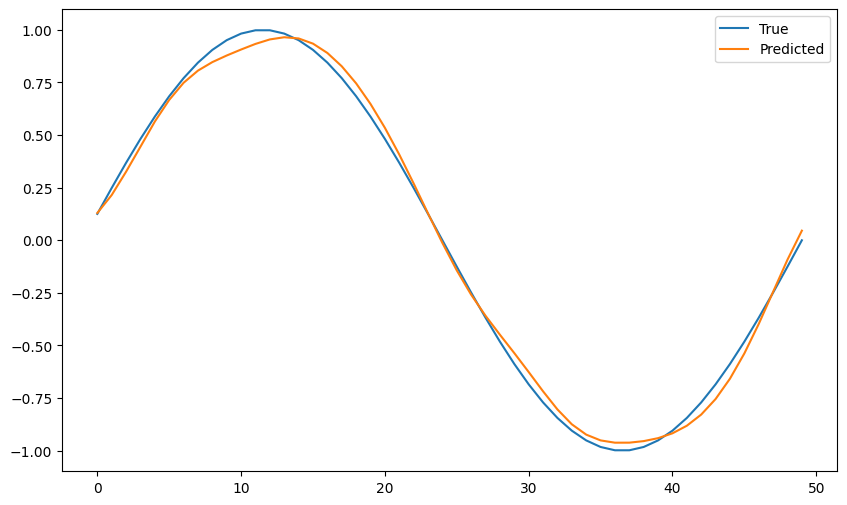

In [16]:
model.eval()
with torch.no_grad():
    predictions = model(X.unsqueeze(2)).squeeze(2).numpy()

plt.figure(figsize=(10, 6))
plt.plot(y[0].numpy(), label='True')
plt.plot(predictions[0], label='Predicted')
plt.legend()
plt.show()